In [166]:
from scipy.stats import norm
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import random


def phi(S, K, r, sigma, t):
    d1 = (np.log(np.array(S)/K)+(r + sigma**2/2)*(pd.DataFrame(t).values)) / (sigma*np.sqrt(pd.DataFrame(t).values))
    return norm.cdf(d1)


def psi_Bt(S, K, r, sigma, t):
    d2 = (np.log(np.array(S)/K)+(r-sigma**2/2)*(pd.DataFrame(t).values)) / (sigma*np.sqrt(pd.DataFrame(t).values))
    return -K*np.exp(-r*(pd.DataFrame(t).values))*norm.cdf(d2)

def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def stock_price(paths, steps, T):
    t, W_t = simulate_Brownian_Motion(paths, steps, T)
    simulated_stock_price = S0*np.exp((r-sigma**2/2)*t + sigma*W_t)
    return t, simulated_stock_price

def setting_seed(seed = 630): # setting the randomness
    random.seed(seed)
    np.random.seed(seed)
    
setting_seed()

In [108]:
paths = 50000 # 50,000 simulation paths
N = 21
N_2 = 84  
r = 0.05
S0 = 100
K = 100
sigma = 0.2
T = 1/12

In [110]:
setting_seed()

steps_1 = N
delta_1 = T/N
t_1, stock_price_1 = stock_price(50000, steps_1, T)

steps_2 = N_2
delta_2 = T/N_2
t_2, stock_price_2 = stock_price(50000, steps_2, T)

In [184]:
def hedging_error(steps,simulated_stock_price, delta_step, t):
    delta = []
    price = []
    next_price = []
    
    for i in range(steps):
        stock_price = simulated_stock_price[ : ,i]
        next_stock_price = simulated_stock_price[ : ,i+1]
        delta_change = T - t[i]
        delta.append(delta_change)
        price.append(stock_price)
        next_price.append(next_stock_price)
        
    next_day= (pd.DataFrame(next_price)*phi(price, K, r, sigma, delta) + psi_Bt(price, K, r, sigma, delta)*np.exp(r*delta_step)).T.sum(axis = 1)
    today = (pd.DataFrame(price)*phi(price, K, r, sigma, delta)+psi_Bt(price, K, r, sigma, delta)).T.sum(axis = 1)
    error = next_day - today
    
    final_profit_and_loss = error + BlackScholesCall(S0, K, r, sigma, T) - pd.DataFrame(np.maximum(simulated_stock_price - K, 0)).iloc[ : ,-1]
    
    return final_profit_and_loss

In [185]:
n_1 = hedging_error(steps_1, stock_price_1, delta_1, t_1)
n_1

0       -0.306626
1       -0.080367
2       -0.331380
3       -0.489548
4        0.269960
           ...   
49995   -0.740241
49996   -0.220180
49997    0.069070
49998    0.537591
49999    0.359147
Length: 50000, dtype: float64

In [241]:
print("mean_error_N_21 = ", n_1.mean())
print("standard_deviation_error_N_21 = ", n_1.std())
print("standard_deviation_error_as_percentage of option_premium_N_21 = ", n_1.std()/BlackScholesCall(S0, K, r, sigma, T) *100)

mean_error_N_21 =  0.003176580109724182
standard_deviation_error_N_21 =  0.42890919504675684
standard_deviation_error_as_percentage of option_premium_N_21 =  17.073954649949464


Text(0, 0.5, 'Frequency')

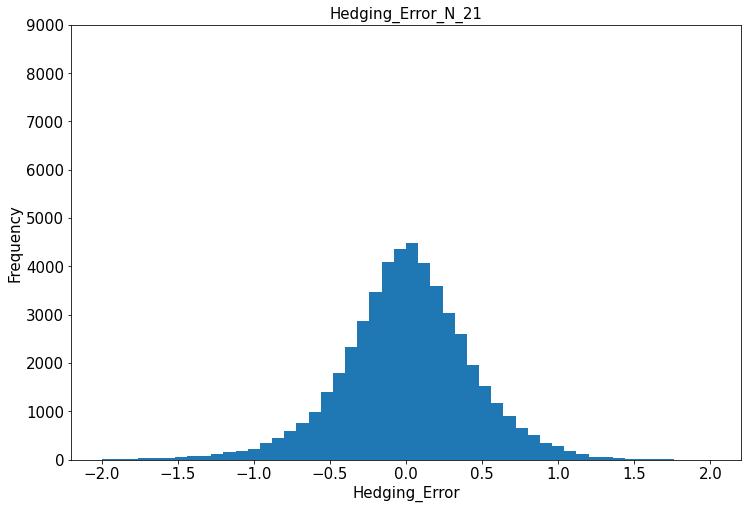

In [235]:
plt.figure(figsize = (12,8))
plt.hist(n_1, bins = 50, range = [-2,2])
plt.ylim(0, 9000)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.title('Hedging_Error_N_21', size = 15)
plt.xlabel('Hedging_Error', size = 15)
plt.ylabel('Frequency', size = 15)

In [187]:
n_2 = hedging_error(steps_2, stock_price_2, delta_2, t_2)
n_2

0        0.123361
1        0.136740
2        0.300952
3       -0.104912
4        0.015155
           ...   
49995   -0.061352
49996   -0.054426
49997   -0.106742
49998   -0.464624
49999    0.042985
Length: 50000, dtype: float64

In [ ]:
StDev of P&L as a % of option premium

In [240]:
print("mean_error_N_84 = ", n_2.mean())
print("standard_deviation_error_N_84 = ", n_2.std())
print("standard_deviation_error_as_percentage of option_premium_N_84 = ", n_2.std()/BlackScholesCall(S0, K, r, sigma, T) *100)

mean_error_N_84 =  0.0009547969376775895
standard_deviation_error_N_84 =  0.21788990986855641
standard_deviation_error_as_percentage of option_premium_N_84 =  8.673729737530463


Text(0, 0.5, 'Frequency')

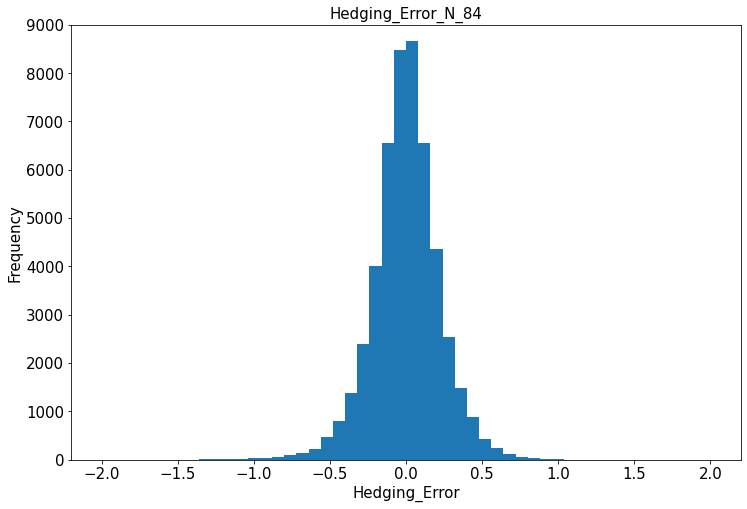

In [234]:
plt.figure(figsize = (12,8))

plt.hist(n_2, bins = 50, range = [-2,2])
plt.ylim(0, 9000)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.title('Hedging_Error_N_84', size = 15)
plt.xlabel('Hedging_Error', size = 15)
plt.ylabel('Frequency', size = 15)

In [247]:
N_3 = 530
steps_3 = N_3
delta_3 = T/N_3
t_3, stock_price_3 = stock_price(50000, steps_3, T)
n_3 = hedging_error(steps_3, stock_price_3, delta_3, t_3)
n_3

0       -0.040312
1        0.010066
2       -0.064400
3        0.105718
4        0.142020
           ...   
49995   -0.021917
49996   -0.000152
49997   -0.055841
49998    0.115994
49999   -0.067302
Length: 50000, dtype: float64

Text(0, 0.5, 'Frequency')

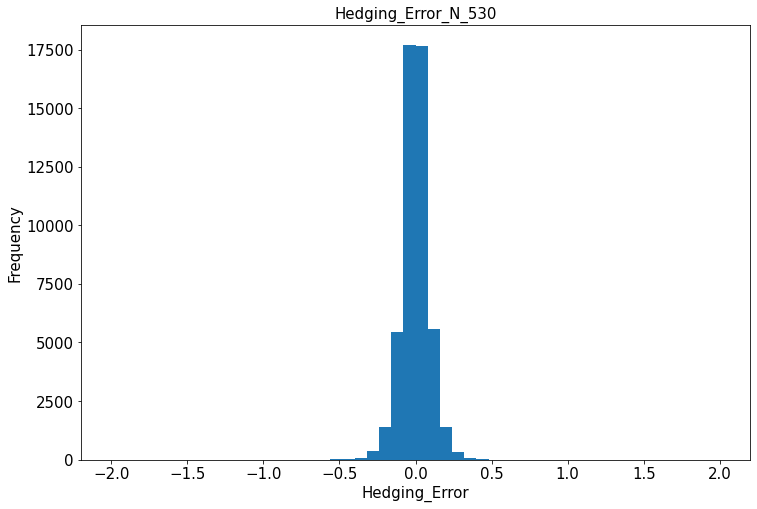

In [250]:
plt.figure(figsize = (12,8))

plt.hist(n_3, bins = 50, range = [-2,2])
plt.ylim()
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.title('Hedging_Error_N_530', size = 15)
plt.xlabel('Hedging_Error', size = 15)
plt.ylabel('Frequency', size = 15)

In [249]:
print("mean_error_N_530 = ", n_3.mean())
print("standard_deviation_error_N_530 = ", n_3.std())
print("standard_deviation_error_as_percentage of option_premium_N_530 = ", n_3.std()/BlackScholesCall(S0, K, r, sigma, T) *100)

mean_error_N_530 =  0.00013470603967957233
standard_deviation_error_N_530 =  0.08747493993736252
standard_deviation_error_as_percentage of option_premium_N_530 =  3.482189644674707


In [291]:
def vega(S0, T, pi):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    vega_value = S0*np.sqrt(T)*(np.exp((-d1**2/2))/np.sqrt(2*pi))
    return vega_value

In [295]:
vega_value = vega(100, 1/12, 3.141592653589793238)
vega_value

11.457839419963527

In [296]:
def sigma_error(pi, sigma, N):
    value = np.sqrt(pi/4) * vega_value * (sigma/np.sqrt(N))
    return value

In [297]:
sigma_error(3.141592653589793238, 0.2, 21)

0.44316761914757813

In [298]:
sigma_error(3.141592653589793238, 0.2, 84)

0.22158380957378906